In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 10

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 1,180
Trainable params: 1,180
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/1 [==============================] - ETA: 0s - loss: 2.3585 - accuracy: 0.1978
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 1s 595ms/step - loss: 2.3585 - accuracy: 0.1978 - val_loss: 2.4941 - val_accuracy: 0.1290
Epoch 2/1000
1/1 [==============================] - ETA: 0s - loss: 2.3692 - accuracy: 0.1978
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 2.3692 - accuracy: 0.1978 - val_loss: 2.4856 - val_accuracy: 0.1290
Epoch 3/1000
1/1 [==============================] - ETA: 0s - loss: 2.3534 - accuracy: 0.1429
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 2.3534 - accuracy: 0.1429 - val_loss: 2.4782 - val_accuracy: 0.1290
Epoch 4/1000
1/1 [==============================] - ETA: 0s - loss: 2.3213 - accuracy: 0.1538
Epoch 4: sa

1/1 [==============================] - 0s 64ms/step - loss: 2.2336 - accuracy: 0.1978 - val_loss: 2.3302 - val_accuracy: 0.1613
Epoch 29/1000
1/1 [==============================] - ETA: 0s - loss: 2.2126 - accuracy: 0.2637
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 64ms/step - loss: 2.2126 - accuracy: 0.2637 - val_loss: 2.3254 - val_accuracy: 0.1290
Epoch 30/1000
1/1 [==============================] - ETA: 0s - loss: 2.2182 - accuracy: 0.2088
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 61ms/step - loss: 2.2182 - accuracy: 0.2088 - val_loss: 2.3208 - val_accuracy: 0.1613
Epoch 31/1000
1/1 [==============================] - ETA: 0s - loss: 2.2439 - accuracy: 0.2308
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 61ms/step - loss: 2.2439 - accuracy: 0.2308 - val_loss: 2.

Epoch 56/1000
1/1 [==============================] - ETA: 0s - loss: 2.1152 - accuracy: 0.2088
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 59ms/step - loss: 2.1152 - accuracy: 0.2088 - val_loss: 2.2060 - val_accuracy: 0.1613
Epoch 57/1000
1/1 [==============================] - ETA: 0s - loss: 2.1926 - accuracy: 0.1868
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 2.1926 - accuracy: 0.1868 - val_loss: 2.2017 - val_accuracy: 0.1935
Epoch 58/1000
1/1 [==============================] - ETA: 0s - loss: 2.1297 - accuracy: 0.2967
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 86ms/step - loss: 2.1297 - accuracy: 0.2967 - val_loss: 2.1975 - val_accuracy: 0.1935
Epoch 59/1000
1/1 [==============================] - ETA: 0s - loss: 2.0980 - accuracy: 0.2198
Epoch

1/1 [==============================] - ETA: 0s - loss: 2.0621 - accuracy: 0.2418
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 2.0621 - accuracy: 0.2418 - val_loss: 2.0843 - val_accuracy: 0.2581
Epoch 84/1000
1/1 [==============================] - ETA: 0s - loss: 2.0854 - accuracy: 0.2527
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 57ms/step - loss: 2.0854 - accuracy: 0.2527 - val_loss: 2.0789 - val_accuracy: 0.2581
Epoch 85/1000
1/1 [==============================] - ETA: 0s - loss: 2.0427 - accuracy: 0.2308
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 57ms/step - loss: 2.0427 - accuracy: 0.2308 - val_loss: 2.0734 - val_accuracy: 0.2581
Epoch 86/1000
1/1 [==============================] - ETA: 0s - loss: 2.0380 - accuracy: 0.2637
Epoch 86: saving mo

1/1 [==============================] - ETA: 0s - loss: 1.9541 - accuracy: 0.2857
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 1.9541 - accuracy: 0.2857 - val_loss: 1.9281 - val_accuracy: 0.2903
Epoch 111/1000
1/1 [==============================] - ETA: 0s - loss: 1.9402 - accuracy: 0.3297
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 1.9402 - accuracy: 0.3297 - val_loss: 1.9224 - val_accuracy: 0.2903
Epoch 112/1000
1/1 [==============================] - ETA: 0s - loss: 1.9788 - accuracy: 0.2747
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 57ms/step - loss: 1.9788 - accuracy: 0.2747 - val_loss: 1.9167 - val_accuracy: 0.2903
Epoch 113/1000
1/1 [==============================] - ETA: 0s - loss: 2.0063 - accuracy: 0.3187
Epoch 113: sa

1/1 [==============================] - ETA: 0s - loss: 1.9661 - accuracy: 0.2747
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 1.9661 - accuracy: 0.2747 - val_loss: 1.7674 - val_accuracy: 0.4516
Epoch 138/1000
1/1 [==============================] - ETA: 0s - loss: 1.9291 - accuracy: 0.3297
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 57ms/step - loss: 1.9291 - accuracy: 0.3297 - val_loss: 1.7613 - val_accuracy: 0.4516
Epoch 139/1000
1/1 [==============================] - ETA: 0s - loss: 1.8490 - accuracy: 0.3516
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 54ms/step - loss: 1.8490 - accuracy: 0.3516 - val_loss: 1.7551 - val_accuracy: 0.4516
Epoch 140/1000
1/1 [==============================] - ETA: 0s - loss: 1.8458 - accuracy: 0.3846
Epoch 140: sa

1/1 [==============================] - ETA: 0s - loss: 1.7859 - accuracy: 0.4176
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 1.7859 - accuracy: 0.4176 - val_loss: 1.5892 - val_accuracy: 0.5484
Epoch 165/1000
1/1 [==============================] - ETA: 0s - loss: 1.7055 - accuracy: 0.4835
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 1.7055 - accuracy: 0.4835 - val_loss: 1.5827 - val_accuracy: 0.5484
Epoch 166/1000
1/1 [==============================] - ETA: 0s - loss: 1.6560 - accuracy: 0.4176
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 1.6560 - accuracy: 0.4176 - val_loss: 1.5763 - val_accuracy: 0.5484
Epoch 167/1000
1/1 [==============================] - ETA: 0s - loss: 1.7920 - accuracy: 0.3626
Epoch 167: sa

1/1 [==============================] - ETA: 0s - loss: 1.6919 - accuracy: 0.3956
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 57ms/step - loss: 1.6919 - accuracy: 0.3956 - val_loss: 1.4308 - val_accuracy: 0.6129
Epoch 192/1000
1/1 [==============================] - ETA: 0s - loss: 1.7701 - accuracy: 0.4286
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 1.7701 - accuracy: 0.4286 - val_loss: 1.4253 - val_accuracy: 0.6129
Epoch 193/1000
1/1 [==============================] - ETA: 0s - loss: 1.6510 - accuracy: 0.4286
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 1.6510 - accuracy: 0.4286 - val_loss: 1.4195 - val_accuracy: 0.6452
Epoch 194/1000
1/1 [==============================] - ETA: 0s - loss: 1.6689 - accuracy: 0.4615
Epoch 194: sa

1/1 [==============================] - ETA: 0s - loss: 1.5972 - accuracy: 0.5055
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 1.5972 - accuracy: 0.5055 - val_loss: 1.2806 - val_accuracy: 0.7419
Epoch 219/1000
1/1 [==============================] - ETA: 0s - loss: 1.5730 - accuracy: 0.4505
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 1.5730 - accuracy: 0.4505 - val_loss: 1.2757 - val_accuracy: 0.7419
Epoch 220/1000
1/1 [==============================] - ETA: 0s - loss: 1.4791 - accuracy: 0.5275
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 54ms/step - loss: 1.4791 - accuracy: 0.5275 - val_loss: 1.2708 - val_accuracy: 0.7419
Epoch 221/1000
1/1 [==============================] - ETA: 0s - loss: 1.6124 - accuracy: 0.3956
Epoch 221: sa

1/1 [==============================] - ETA: 0s - loss: 1.5423 - accuracy: 0.4615
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 1.5423 - accuracy: 0.4615 - val_loss: 1.1614 - val_accuracy: 0.7419
Epoch 246/1000
1/1 [==============================] - ETA: 0s - loss: 1.4911 - accuracy: 0.4945
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 54ms/step - loss: 1.4911 - accuracy: 0.4945 - val_loss: 1.1572 - val_accuracy: 0.7742
Epoch 247/1000
1/1 [==============================] - ETA: 0s - loss: 1.4634 - accuracy: 0.4945
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 1.4634 - accuracy: 0.4945 - val_loss: 1.1537 - val_accuracy: 0.7742
Epoch 248/1000
1/1 [==============================] - ETA: 0s - loss: 1.5447 - accuracy: 0.4615
Epoch 248: sa

1/1 [==============================] - ETA: 0s - loss: 1.3740 - accuracy: 0.5275
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 54ms/step - loss: 1.3740 - accuracy: 0.5275 - val_loss: 1.0545 - val_accuracy: 0.7742
Epoch 273/1000
1/1 [==============================] - ETA: 0s - loss: 1.3909 - accuracy: 0.4945
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 54ms/step - loss: 1.3909 - accuracy: 0.4945 - val_loss: 1.0503 - val_accuracy: 0.7742
Epoch 274/1000
1/1 [==============================] - ETA: 0s - loss: 1.4615 - accuracy: 0.4615
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 1.4615 - accuracy: 0.4615 - val_loss: 1.0457 - val_accuracy: 0.7742
Epoch 275/1000
1/1 [==============================] - ETA: 0s - loss: 1.3519 - accuracy: 0.5495
Epoch 275: sa

1/1 [==============================] - ETA: 0s - loss: 1.3461 - accuracy: 0.5714
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 61ms/step - loss: 1.3461 - accuracy: 0.5714 - val_loss: 0.9790 - val_accuracy: 0.8065
Epoch 300/1000
1/1 [==============================] - ETA: 0s - loss: 1.3392 - accuracy: 0.5824
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 1.3392 - accuracy: 0.5824 - val_loss: 0.9750 - val_accuracy: 0.8065
Epoch 301/1000
1/1 [==============================] - ETA: 0s - loss: 1.3205 - accuracy: 0.5714
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 1.3205 - accuracy: 0.5714 - val_loss: 0.9710 - val_accuracy: 0.8065
Epoch 302/1000
1/1 [==============================] - ETA: 0s - loss: 1.3178 - accuracy: 0.5714
Epoch 302: sa

1/1 [==============================] - ETA: 0s - loss: 1.3898 - accuracy: 0.4835
Epoch 326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 1.3898 - accuracy: 0.4835 - val_loss: 0.8858 - val_accuracy: 0.8387
Epoch 327/1000
1/1 [==============================] - ETA: 0s - loss: 1.2705 - accuracy: 0.5275
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 64ms/step - loss: 1.2705 - accuracy: 0.5275 - val_loss: 0.8835 - val_accuracy: 0.8387
Epoch 328/1000
1/1 [==============================] - ETA: 0s - loss: 1.1605 - accuracy: 0.6374
Epoch 328: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 58ms/step - loss: 1.1605 - accuracy: 0.6374 - val_loss: 0.8809 - val_accuracy: 0.8387
Epoch 329/1000
1/1 [==============================] - ETA: 0s - loss: 1.3585 - accuracy: 0.4945
Epoch 329: sa

1/1 [==============================] - ETA: 0s - loss: 1.2719 - accuracy: 0.5275
Epoch 353: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 1.2719 - accuracy: 0.5275 - val_loss: 0.8288 - val_accuracy: 0.8387
Epoch 354/1000
1/1 [==============================] - ETA: 0s - loss: 1.2324 - accuracy: 0.6044
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 1.2324 - accuracy: 0.6044 - val_loss: 0.8252 - val_accuracy: 0.8387
Epoch 355/1000
1/1 [==============================] - ETA: 0s - loss: 1.3719 - accuracy: 0.4725
Epoch 355: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 1.3719 - accuracy: 0.4725 - val_loss: 0.8219 - val_accuracy: 0.8387
Epoch 356/1000
1/1 [==============================] - ETA: 0s - loss: 1.3979 - accuracy: 0.4945
Epoch 356: sa

1/1 [==============================] - ETA: 0s - loss: 1.2362 - accuracy: 0.5165
Epoch 380: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 1.2362 - accuracy: 0.5165 - val_loss: 0.7592 - val_accuracy: 0.8387
Epoch 381/1000
1/1 [==============================] - ETA: 0s - loss: 1.1283 - accuracy: 0.6264
Epoch 381: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 1.1283 - accuracy: 0.6264 - val_loss: 0.7574 - val_accuracy: 0.8387
Epoch 382/1000
1/1 [==============================] - ETA: 0s - loss: 1.1286 - accuracy: 0.6154
Epoch 382: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 57ms/step - loss: 1.1286 - accuracy: 0.6154 - val_loss: 0.7556 - val_accuracy: 0.8387
Epoch 383/1000
1/1 [==============================] - ETA: 0s - loss: 1.2291 - accuracy: 0.4835
Epoch 383: sa

1/1 [==============================] - ETA: 0s - loss: 1.2028 - accuracy: 0.5604
Epoch 407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 1.2028 - accuracy: 0.5604 - val_loss: 0.7136 - val_accuracy: 0.8387
Epoch 408/1000
1/1 [==============================] - ETA: 0s - loss: 1.1347 - accuracy: 0.6044
Epoch 408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 57ms/step - loss: 1.1347 - accuracy: 0.6044 - val_loss: 0.7117 - val_accuracy: 0.8387
Epoch 409/1000
1/1 [==============================] - ETA: 0s - loss: 1.2455 - accuracy: 0.5934
Epoch 409: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 54ms/step - loss: 1.2455 - accuracy: 0.5934 - val_loss: 0.7097 - val_accuracy: 0.8387
Epoch 410/1000
1/1 [==============================] - ETA: 0s - loss: 1.2016 - accuracy: 0.5934
Epoch 410: sa

1/1 [==============================] - ETA: 0s - loss: 1.2178 - accuracy: 0.5495
Epoch 434: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 57ms/step - loss: 1.2178 - accuracy: 0.5495 - val_loss: 0.6722 - val_accuracy: 0.8387
Epoch 435/1000
1/1 [==============================] - ETA: 0s - loss: 1.1112 - accuracy: 0.5495
Epoch 435: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 1.1112 - accuracy: 0.5495 - val_loss: 0.6712 - val_accuracy: 0.8387
Epoch 436/1000
1/1 [==============================] - ETA: 0s - loss: 1.1814 - accuracy: 0.5495
Epoch 436: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 1.1814 - accuracy: 0.5495 - val_loss: 0.6701 - val_accuracy: 0.8387
Epoch 437/1000
1/1 [==============================] - ETA: 0s - loss: 1.1237 - accuracy: 0.5385
Epoch 437: sa

1/1 [==============================] - ETA: 0s - loss: 1.1937 - accuracy: 0.5714
Epoch 461: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 54ms/step - loss: 1.1937 - accuracy: 0.5714 - val_loss: 0.6269 - val_accuracy: 0.8387
Epoch 462/1000
1/1 [==============================] - ETA: 0s - loss: 1.1423 - accuracy: 0.6044
Epoch 462: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 1.1423 - accuracy: 0.6044 - val_loss: 0.6251 - val_accuracy: 0.8387
Epoch 463/1000
1/1 [==============================] - ETA: 0s - loss: 1.2518 - accuracy: 0.5604
Epoch 463: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 1.2518 - accuracy: 0.5604 - val_loss: 0.6238 - val_accuracy: 0.8387
Epoch 464/1000
1/1 [==============================] - ETA: 0s - loss: 1.1413 - accuracy: 0.6044
Epoch 464: sa

1/1 [==============================] - ETA: 0s - loss: 1.2459 - accuracy: 0.5824
Epoch 488: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 1.2459 - accuracy: 0.5824 - val_loss: 0.5888 - val_accuracy: 0.8387
Epoch 489/1000
1/1 [==============================] - ETA: 0s - loss: 1.1209 - accuracy: 0.5824
Epoch 489: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 1.1209 - accuracy: 0.5824 - val_loss: 0.5865 - val_accuracy: 0.8387
Epoch 490/1000
1/1 [==============================] - ETA: 0s - loss: 0.9511 - accuracy: 0.7033
Epoch 490: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 0.9511 - accuracy: 0.7033 - val_loss: 0.5843 - val_accuracy: 0.8387
Epoch 491/1000
1/1 [==============================] - ETA: 0s - loss: 1.0469 - accuracy: 0.6593
Epoch 491: sa

1/1 [==============================] - ETA: 0s - loss: 1.1214 - accuracy: 0.5604
Epoch 515: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 1.1214 - accuracy: 0.5604 - val_loss: 0.5479 - val_accuracy: 0.8387
Epoch 516/1000
1/1 [==============================] - ETA: 0s - loss: 0.9527 - accuracy: 0.6593
Epoch 516: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 0.9527 - accuracy: 0.6593 - val_loss: 0.5462 - val_accuracy: 0.8387
Epoch 517/1000
1/1 [==============================] - ETA: 0s - loss: 0.9911 - accuracy: 0.6703
Epoch 517: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 0.9911 - accuracy: 0.6703 - val_loss: 0.5444 - val_accuracy: 0.8387
Epoch 518/1000
1/1 [==============================] - ETA: 0s - loss: 1.0982 - accuracy: 0.6044
Epoch 518: sa

1/1 [==============================] - ETA: 0s - loss: 0.9727 - accuracy: 0.6593
Epoch 542: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 0.9727 - accuracy: 0.6593 - val_loss: 0.5146 - val_accuracy: 0.8387
Epoch 543/1000
1/1 [==============================] - ETA: 0s - loss: 1.0859 - accuracy: 0.5934
Epoch 543: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 1.0859 - accuracy: 0.5934 - val_loss: 0.5130 - val_accuracy: 0.8387
Epoch 544/1000
1/1 [==============================] - ETA: 0s - loss: 1.0245 - accuracy: 0.6593
Epoch 544: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 1.0245 - accuracy: 0.6593 - val_loss: 0.5114 - val_accuracy: 0.8387
Epoch 545/1000
1/1 [==============================] - ETA: 0s - loss: 1.0910 - accuracy: 0.6593
Epoch 545: sa

1/1 [==============================] - ETA: 0s - loss: 1.0915 - accuracy: 0.6264
Epoch 569: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 60ms/step - loss: 1.0915 - accuracy: 0.6264 - val_loss: 0.4846 - val_accuracy: 0.8387
Epoch 570/1000
1/1 [==============================] - ETA: 0s - loss: 1.0981 - accuracy: 0.5934
Epoch 570: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 60ms/step - loss: 1.0981 - accuracy: 0.5934 - val_loss: 0.4845 - val_accuracy: 0.8387
Epoch 571/1000
1/1 [==============================] - ETA: 0s - loss: 0.9996 - accuracy: 0.6484
Epoch 571: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 0.9996 - accuracy: 0.6484 - val_loss: 0.4844 - val_accuracy: 0.8387
Epoch 572/1000
1/1 [==============================] - ETA: 0s - loss: 0.9511 - accuracy: 0.6593
Epoch 572: sa

1/1 [==============================] - ETA: 0s - loss: 1.1047 - accuracy: 0.6154
Epoch 596: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 1.1047 - accuracy: 0.6154 - val_loss: 0.4707 - val_accuracy: 0.8387
Epoch 597/1000
1/1 [==============================] - ETA: 0s - loss: 1.1006 - accuracy: 0.6374
Epoch 597: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 59ms/step - loss: 1.1006 - accuracy: 0.6374 - val_loss: 0.4696 - val_accuracy: 0.8387
Epoch 598/1000
1/1 [==============================] - ETA: 0s - loss: 1.0567 - accuracy: 0.5934
Epoch 598: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 1.0567 - accuracy: 0.5934 - val_loss: 0.4687 - val_accuracy: 0.8387
Epoch 599/1000
1/1 [==============================] - ETA: 0s - loss: 0.9791 - accuracy: 0.6154
Epoch 599: sa

1/1 [==============================] - ETA: 0s - loss: 1.0379 - accuracy: 0.6484
Epoch 623: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 1.0379 - accuracy: 0.6484 - val_loss: 0.4601 - val_accuracy: 0.8387
Epoch 624/1000
1/1 [==============================] - ETA: 0s - loss: 0.9963 - accuracy: 0.6484
Epoch 624: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 57ms/step - loss: 0.9963 - accuracy: 0.6484 - val_loss: 0.4590 - val_accuracy: 0.8387
Epoch 625/1000
1/1 [==============================] - ETA: 0s - loss: 0.9803 - accuracy: 0.7033
Epoch 625: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 0.9803 - accuracy: 0.7033 - val_loss: 0.4577 - val_accuracy: 0.8387
Epoch 626/1000
1/1 [==============================] - ETA: 0s - loss: 0.9938 - accuracy: 0.6593
Epoch 626: sa

1/1 [==============================] - ETA: 0s - loss: 1.0317 - accuracy: 0.5604
Epoch 650: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 1.0317 - accuracy: 0.5604 - val_loss: 0.4318 - val_accuracy: 0.8387
Epoch 651/1000
1/1 [==============================] - ETA: 0s - loss: 1.0046 - accuracy: 0.6374
Epoch 651: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 54ms/step - loss: 1.0046 - accuracy: 0.6374 - val_loss: 0.4313 - val_accuracy: 0.8387
Epoch 652/1000
1/1 [==============================] - ETA: 0s - loss: 0.9613 - accuracy: 0.6264
Epoch 652: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 0.9613 - accuracy: 0.6264 - val_loss: 0.4308 - val_accuracy: 0.8387
Epoch 653/1000
1/1 [==============================] - ETA: 0s - loss: 0.9254 - accuracy: 0.6593
Epoch 653: sa

1/1 [==============================] - ETA: 0s - loss: 0.7937 - accuracy: 0.6923
Epoch 677: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 57ms/step - loss: 0.7937 - accuracy: 0.6923 - val_loss: 0.4071 - val_accuracy: 0.8387
Epoch 678/1000
1/1 [==============================] - ETA: 0s - loss: 0.8389 - accuracy: 0.7143
Epoch 678: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 0.8389 - accuracy: 0.7143 - val_loss: 0.4057 - val_accuracy: 0.8387
Epoch 679/1000
1/1 [==============================] - ETA: 0s - loss: 1.0421 - accuracy: 0.5934
Epoch 679: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 1.0421 - accuracy: 0.5934 - val_loss: 0.4042 - val_accuracy: 0.8387
Epoch 680/1000
1/1 [==============================] - ETA: 0s - loss: 0.9992 - accuracy: 0.6044
Epoch 680: sa

1/1 [==============================] - ETA: 0s - loss: 0.8757 - accuracy: 0.6923
Epoch 704: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 0.8757 - accuracy: 0.6923 - val_loss: 0.3900 - val_accuracy: 0.8387
Epoch 705/1000
1/1 [==============================] - ETA: 0s - loss: 0.9427 - accuracy: 0.6484
Epoch 705: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 0.9427 - accuracy: 0.6484 - val_loss: 0.3897 - val_accuracy: 0.8387
Epoch 706/1000
1/1 [==============================] - ETA: 0s - loss: 1.1415 - accuracy: 0.5604
Epoch 706: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 1.1415 - accuracy: 0.5604 - val_loss: 0.3897 - val_accuracy: 0.8387
Epoch 707/1000
1/1 [==============================] - ETA: 0s - loss: 0.8068 - accuracy: 0.6923
Epoch 707: sa

1/1 [==============================] - ETA: 0s - loss: 0.8447 - accuracy: 0.6703
Epoch 731: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 58ms/step - loss: 0.8447 - accuracy: 0.6703 - val_loss: 0.3710 - val_accuracy: 0.8387
Epoch 732/1000
1/1 [==============================] - ETA: 0s - loss: 0.9788 - accuracy: 0.6154
Epoch 732: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 0.9788 - accuracy: 0.6154 - val_loss: 0.3706 - val_accuracy: 0.8387
Epoch 733/1000
1/1 [==============================] - ETA: 0s - loss: 0.9385 - accuracy: 0.6484
Epoch 733: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 0.9385 - accuracy: 0.6484 - val_loss: 0.3703 - val_accuracy: 0.8387
Epoch 734/1000
1/1 [==============================] - ETA: 0s - loss: 0.8887 - accuracy: 0.7253
Epoch 734: sa

1/1 [==============================] - ETA: 0s - loss: 1.0917 - accuracy: 0.5824
Epoch 758: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 58ms/step - loss: 1.0917 - accuracy: 0.5824 - val_loss: 0.3608 - val_accuracy: 0.9355
Epoch 759/1000
1/1 [==============================] - ETA: 0s - loss: 0.8786 - accuracy: 0.6813
Epoch 759: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 0.8786 - accuracy: 0.6813 - val_loss: 0.3610 - val_accuracy: 0.9355
Epoch 760/1000
1/1 [==============================] - ETA: 0s - loss: 0.9302 - accuracy: 0.6264
Epoch 760: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 0.9302 - accuracy: 0.6264 - val_loss: 0.3605 - val_accuracy: 0.9355
Epoch 761/1000
1/1 [==============================] - ETA: 0s - loss: 0.9702 - accuracy: 0.6484
Epoch 761: sa

1/1 [==============================] - ETA: 0s - loss: 0.9025 - accuracy: 0.6813
Epoch 785: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 0.9025 - accuracy: 0.6813 - val_loss: 0.3475 - val_accuracy: 0.8387
Epoch 786/1000
1/1 [==============================] - ETA: 0s - loss: 0.9297 - accuracy: 0.5824
Epoch 786: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 58ms/step - loss: 0.9297 - accuracy: 0.5824 - val_loss: 0.3476 - val_accuracy: 0.8387
Epoch 787/1000
1/1 [==============================] - ETA: 0s - loss: 0.7568 - accuracy: 0.6923
Epoch 787: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 54ms/step - loss: 0.7568 - accuracy: 0.6923 - val_loss: 0.3477 - val_accuracy: 0.8387
Epoch 788/1000
1/1 [==============================] - ETA: 0s - loss: 0.7451 - accuracy: 0.7253
Epoch 788: sa

1/1 [==============================] - ETA: 0s - loss: 0.9344 - accuracy: 0.6484
Epoch 812: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 58ms/step - loss: 0.9344 - accuracy: 0.6484 - val_loss: 0.3376 - val_accuracy: 0.9032
Epoch 813/1000
1/1 [==============================] - ETA: 0s - loss: 1.1800 - accuracy: 0.5275
Epoch 813: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 1.1800 - accuracy: 0.5275 - val_loss: 0.3372 - val_accuracy: 0.9032
Epoch 814/1000
1/1 [==============================] - ETA: 0s - loss: 1.1547 - accuracy: 0.5934
Epoch 814: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 1.1547 - accuracy: 0.5934 - val_loss: 0.3370 - val_accuracy: 0.9355
Epoch 815/1000
1/1 [==============================] - ETA: 0s - loss: 0.8650 - accuracy: 0.6813
Epoch 815: sa

1/1 [==============================] - ETA: 0s - loss: 0.8853 - accuracy: 0.6484
Epoch 839: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 57ms/step - loss: 0.8853 - accuracy: 0.6484 - val_loss: 0.3346 - val_accuracy: 0.8387
Epoch 840/1000
1/1 [==============================] - ETA: 0s - loss: 0.6741 - accuracy: 0.7473
Epoch 840: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 60ms/step - loss: 0.6741 - accuracy: 0.7473 - val_loss: 0.3333 - val_accuracy: 0.8387
Epoch 841/1000
1/1 [==============================] - ETA: 0s - loss: 0.9331 - accuracy: 0.6154
Epoch 841: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 0.9331 - accuracy: 0.6154 - val_loss: 0.3323 - val_accuracy: 0.8387
Epoch 842/1000
1/1 [==============================] - ETA: 0s - loss: 0.8630 - accuracy: 0.7253
Epoch 842: sa

1/1 [==============================] - ETA: 0s - loss: 0.7515 - accuracy: 0.7143
Epoch 866: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 0.7515 - accuracy: 0.7143 - val_loss: 0.3272 - val_accuracy: 0.9355
Epoch 867/1000
1/1 [==============================] - ETA: 0s - loss: 0.8138 - accuracy: 0.7253
Epoch 867: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 65ms/step - loss: 0.8138 - accuracy: 0.7253 - val_loss: 0.3264 - val_accuracy: 0.9355
Epoch 868/1000
1/1 [==============================] - ETA: 0s - loss: 0.7936 - accuracy: 0.7143
Epoch 868: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 0.7936 - accuracy: 0.7143 - val_loss: 0.3257 - val_accuracy: 0.9355
Epoch 869/1000
1/1 [==============================] - ETA: 0s - loss: 0.8550 - accuracy: 0.6593
Epoch 869: sa

1/1 [==============================] - ETA: 0s - loss: 0.8485 - accuracy: 0.7033
Epoch 893: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 65ms/step - loss: 0.8485 - accuracy: 0.7033 - val_loss: 0.3112 - val_accuracy: 0.9355
Epoch 894/1000
1/1 [==============================] - ETA: 0s - loss: 0.8579 - accuracy: 0.6593
Epoch 894: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 65ms/step - loss: 0.8579 - accuracy: 0.6593 - val_loss: 0.3107 - val_accuracy: 0.9355
Epoch 895/1000
1/1 [==============================] - ETA: 0s - loss: 0.8012 - accuracy: 0.6703
Epoch 895: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 59ms/step - loss: 0.8012 - accuracy: 0.6703 - val_loss: 0.3107 - val_accuracy: 0.9355
Epoch 896/1000
1/1 [==============================] - ETA: 0s - loss: 0.7785 - accuracy: 0.7473
Epoch 896: sa

1/1 [==============================] - ETA: 0s - loss: 0.8186 - accuracy: 0.7363
Epoch 920: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 59ms/step - loss: 0.8186 - accuracy: 0.7363 - val_loss: 0.3020 - val_accuracy: 0.9355
Epoch 921/1000
1/1 [==============================] - ETA: 0s - loss: 0.8178 - accuracy: 0.7143
Epoch 921: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 0.8178 - accuracy: 0.7143 - val_loss: 0.3006 - val_accuracy: 0.9355
Epoch 922/1000
1/1 [==============================] - ETA: 0s - loss: 0.9744 - accuracy: 0.6813
Epoch 922: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 0.9744 - accuracy: 0.6813 - val_loss: 0.2995 - val_accuracy: 0.9355
Epoch 923/1000
1/1 [==============================] - ETA: 0s - loss: 0.8817 - accuracy: 0.6593
Epoch 923: sa

1/1 [==============================] - ETA: 0s - loss: 0.7423 - accuracy: 0.7363
Epoch 947: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 0.7423 - accuracy: 0.7363 - val_loss: 0.3091 - val_accuracy: 0.9032
Epoch 948/1000
1/1 [==============================] - ETA: 0s - loss: 0.8078 - accuracy: 0.7253
Epoch 948: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 60ms/step - loss: 0.8078 - accuracy: 0.7253 - val_loss: 0.3094 - val_accuracy: 0.9032
Epoch 948: early stopping


In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 28ms/step - loss: 0.3094 - accuracy: 0.9032


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 89ms/step
[1.2246727e-03 7.3746645e-01 1.6905461e-02 2.4613400e-03 1.7644359e-02
 5.9849990e-04 4.8900879e-04 2.0305444e-02 2.0267515e-01 2.2953778e-04]
1


# 混同行列

1/1 [==============================] - 0s 19ms/step


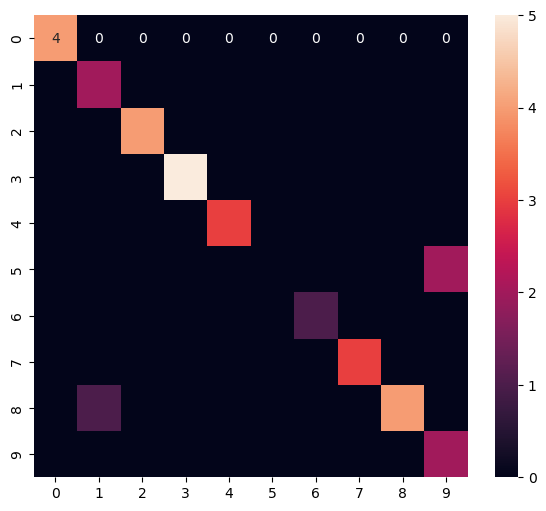

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3
           8       1.00      0.80      0.89         5
           9       0.50      1.00      0.67         2

    accuracy                           0.90        31
   macro avg       0.82      0.88      0.84        31
weighted avg       0.88      0.90      0.88        31



C:\Users\neeraj laishram\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\neeraj laishram\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\neeraj laishram\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\NEERAJ~1\AppData\Local\Temp\tmpe8sq_4xi\assets


6808

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 1 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.2246721e-03 7.3746651e-01 1.6905462e-02 2.4613400e-03 1.7644361e-02
 5.9849990e-04 4.8900861e-04 2.0305438e-02 2.0267518e-01 2.2953781e-04]
1
